## Import Libraries

In [3]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
import sys
from collections import Counter
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from itertools import combinations
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pretty_confusion_matrix import pp_matrix, pp_matrix_from_data

## Import dataset

In [4]:
# Importing the datasets
dataset = pd.read_csv('train.csv')
dataset

,ID (this is not a feature),age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,1,36,Private,355053,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,28,United-States,<=50K
1,2,30,Self-emp-inc,132601,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2,3,19,Private,63814,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,18,United-States,<=50K
3,4,44,Private,112507,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,5,51,Self-emp-inc,126850,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,65,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38837,38838,56,Self-emp-not-inc,157486,10th,6,Divorced,Sales,Own-child,White,Male,0,0,40,United-States,<=50K
38838,38839,43,?,109912,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,7,United-States,>50K
38839,38840,28,Private,271012,HS-grad,9,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
38840,38841,75,Private,191446,1st-4th,2,Married-civ-spouse,Other-service,Other-relative,Black,Female,0,0,16,United-States,<=50K


In [5]:
# details of the data set

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38842 entries, 0 to 38841
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID (this is not a feature)  38842 non-null  int64 
 1   age                         38842 non-null  int64 
 2   workclass                   38842 non-null  object
 3   fnlwgt                      38842 non-null  int64 
 4   education                   38842 non-null  object
 5   education-num               38842 non-null  int64 
 6   marital-status              38842 non-null  object
 7   occupation                  38842 non-null  object
 8   relationship                38842 non-null  object
 9   race                        38842 non-null  object
 10  sex                         38842 non-null  object
 11  capital-gain                38842 non-null  int64 
 12  capital-loss                38842 non-null  int64 
 13  hours-per-week              38842 non-null  in

In [6]:
# describing the data set

dataset.describe()

,ID (this is not a feature),age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,38842.000000,38842.000000,3.884200e+04,38842.000000,38842.000000,38842.000000,38842.000000
mean,19421.500000,38.657664,1.896647e+05,10.079090,1104.456696,88.272334,40.416559
std,11212.863915,13.723819,1.059645e+05,2.569149,7606.736264,404.032486,12.385112
min,1.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,9711.250000,28.000000,1.173630e+05,9.000000,0.000000,0.000000,40.000000
50%,19421.500000,37.000000,1.782185e+05,10.000000,0.000000,0.000000,40.000000
75%,29131.750000,48.000000,2.376275e+05,12.000000,0.000000,0.000000,45.000000
max,38842.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Observing the length of data
len(dataset)

38842

## SVM With Linear Kernel

In [8]:
dataset = dataset.sample(frac=1, random_state=10)
holdout = dataset[:3000]
dataset = dataset[:-3000]

In [9]:
print(len(dataset))
print(len(holdout))

35842
3000


## Exploratory data analysis for SVM Model Analysis

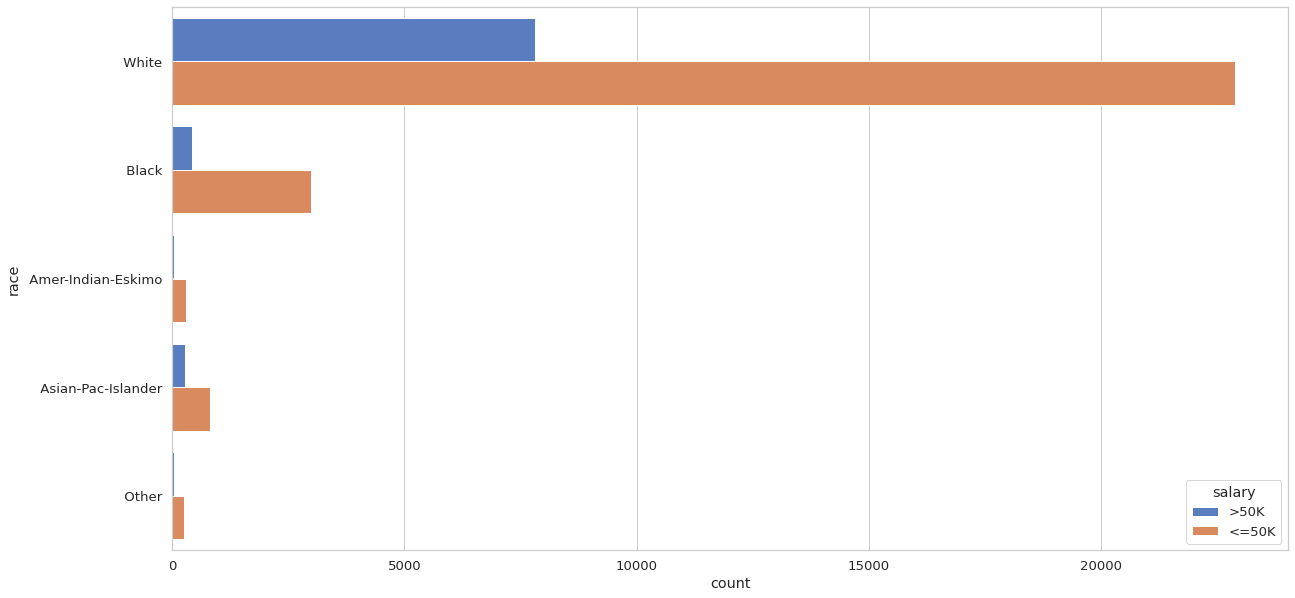

In [11]:
from matplotlib import pyplot
sns.set(style="whitegrid", font_scale=1.2)

a4_dims = (20, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.countplot(y="race", hue="salary", data=dataset, palette="muted")

In [9]:
# There is a growth in the proportion of people whose income is larger than 50k the higher the education attained gets. 
# The growth is almost non-existent for the first few levels from pre-school to 12th, this may indicate that the growth is not entirely linear. 
# For the Masters and Doctorate category, the number of people who earn more than 50k is higher than the people who earn less than 50k. Overall, we can see that there is indeed a correlation between the income variable and the level of education attained.

# Let's then take a look at marital status. Which is another interesting variable.

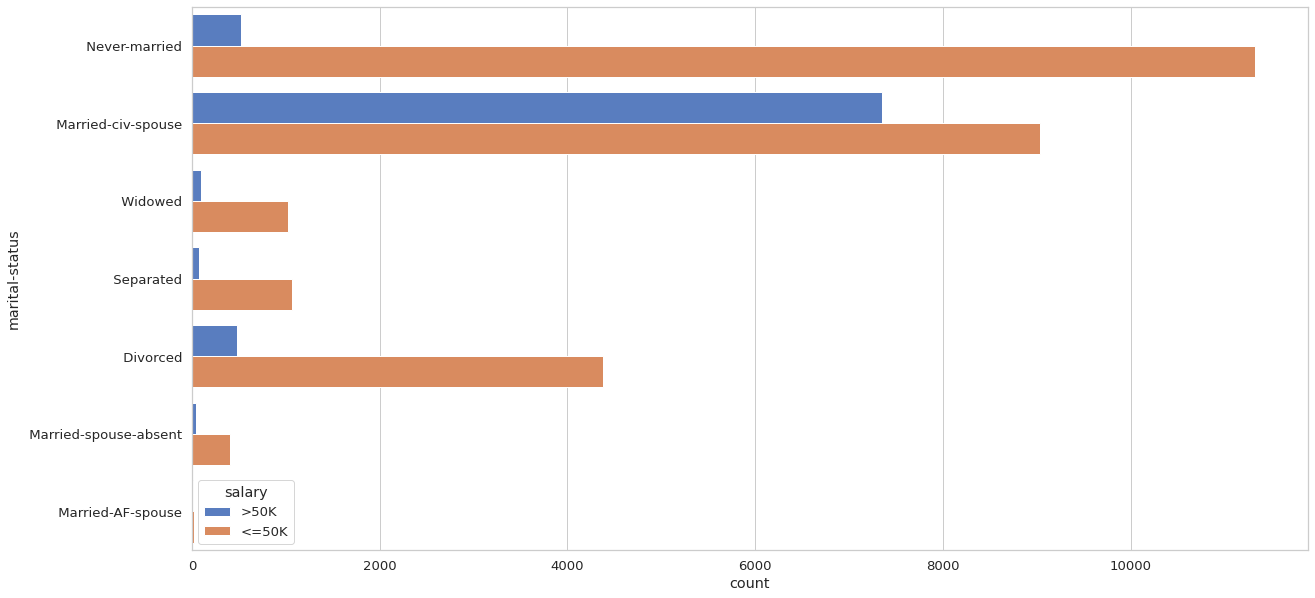

In [12]:
sns.set(style="whitegrid", font_scale=1.2)

# Draw a nested barplot to show survival for class and sex
a4_dims = (20, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.countplot(y="marital-status", hue="salary", data=dataset, palette="muted")

In [11]:
# The number of people whose income is lesser than 50k is significantly higher than the number of people who earn more or equal to 50k for all of the statuses except Married-civ-spouse. 
# For the status Married-civ-spouse, the number of people who earn more or equal to 50k is close to the number of people who earn less. This may be because as a spouse, being able to provide for the family or children would normally require an salary higher than 50k. 
# Overall, this variable shows correlation as well to the income variable as there are noticeable differences.

<AxesSubplot:>

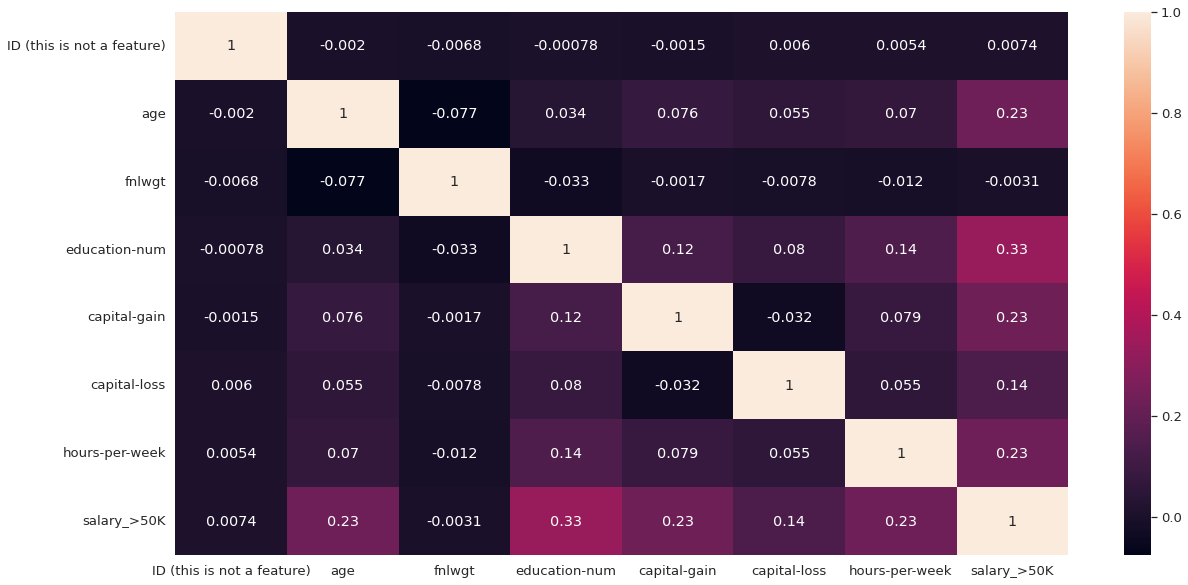

In [13]:
dataset = pd.get_dummies(dataset, columns=['salary'])
dataset = dataset.drop(['salary_<=50K'], axis=1)
corr = dataset.corr()
a4_dims = (20, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(corr, annot=True)

In [13]:
# The pair of variables with the highest correlation would be the "educationnum" and "salary>50k". 
# This makes sense as we've observed earlier that there is indeed a difference in the income variable the higher the level of attained education becomes. 
# Another noticeable pair would be "income>50k" and "age", this is understandable as the higher your age, the more likely that you've attained a higher position at a company. 
# "hours.per.week" paired with "salary>50k" also has the same correlation as the previous pair. This makes sense as more hours per week renderred could affect the amount of pay or income that you would obtain. 
# Lastly, the pair "capital.gain" and "salary_>50K" is also correlated to each other. A higher capital gain could also indicate a higher income so this pair being correlated is also understandable.

In [14]:
dataset_2 = dataset.copy()
dataset = pd.get_dummies(dataset, columns=['occupation', 'race', 'workclass', 'marital-status', 'relationship'])

In [15]:
dataset.corr().unstack().sort_values().drop_duplicates()

race_ Black                         race_ White                          -0.791166
marital-status_ Never-married       marital-status_ Married-civ-spouse   -0.644716
relationship_ Husband               marital-status_ Never-married        -0.576685
marital-status_ Never-married       age                                  -0.540083
marital-status_ Married-civ-spouse  relationship_ Not-in-family          -0.538669
                                                                            ...   
salary_>50K                         marital-status_ Married-civ-spouse    0.448888
relationship_ Own-child             marital-status_ Never-married         0.513645
relationship_ Husband               marital-status_ Married-civ-spouse    0.893452
workclass_ ?                        occupation_ ?                         0.998721
ID (this is not a feature)          ID (this is not a feature)            1.000000
Length: 1226, dtype: float64

In [16]:
dataset = dataset_2
dataset = pd.get_dummies(dataset, columns=['occupation', 'race', 'workclass', 'marital-status'])

In [17]:
dataset['salary_>50K'].corr(dataset['education-num'])

0.3320143665537045

In [18]:
# Since we've noticed that the first few levels exhibited an almost unnoticeable growth in the number of people earning more than 50k, we'll group the first 8 educational levels into one.

In [19]:
dataset['new_education-num'] = dataset.apply(lambda x: x['education-num']-8 if x['education-num'] >= 9 else 0, axis=1)

In [20]:
dataset['salary_>50K'].corr(dataset['new_education-num'])

0.3532202123125932

In [21]:
# We can see a small increase in correlation as compared to our previous unchanged variable. 
# Note that correlation that is used is Pearson Correlation and it only takes into account the linear relationship between the two variables.

In [22]:
from sklearn.feature_selection import SelectPercentile, chi2

X = dataset.drop(['salary_>50K', 'education', 'sex', 'native-country', 'education-num', 'relationship'], axis=1)
y = dataset[['salary_>50K']]

test = SelectPercentile(score_func=chi2, percentile=16)

fit = test.fit(X, y)

X.columns[test.get_support()]

Index(['ID (this is not a feature)', 'age', 'fnlwgt', 'capital-gain',
       'capital-loss', 'hours-per-week', 'new_education-num'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler

X = dataset[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'marital-status_ Married-civ-spouse', 'new_education-num']]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Modeling and Evaluation

In [24]:
from sklearn.svm import SVC, LinearSVC
model = LinearSVC(max_iter = 10000, dual=False)
model.fit(X, y.values.ravel())

LinearSVC(dual=False, max_iter=10000)

In [25]:
# Let's now utilize our holdout set to assess our model's performance. 
# The same steps we took during the feature engineering abd selection phase will be done again for our holdout set.

In [26]:
holdout['new_education-num'] = holdout.apply(lambda x: x['education-num']-8 if x['education-num'] >= 9 else 0, axis=1)

holdout = pd.get_dummies(holdout, columns=['occupation', 'race', 'workclass', 'marital-status', 'salary'])

test_X = holdout[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'marital-status_ Married-civ-spouse', 'new_education-num']]
test_y = holdout[['salary_>50K']]

test_X = scaler.transform(test_X)
y_pred = model.predict(test_X)

In [27]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred, target_names=['Income more than 50K', 'Income less than 50K']))

                      precision    recall  f1-score   support

Income more than 50K       0.87      0.94      0.90      2287
Income less than 50K       0.74      0.56      0.64       713

            accuracy                           0.85      3000
           macro avg       0.81      0.75      0.77      3000
        weighted avg       0.84      0.85      0.84      3000



# With Linear SVM we got 85% accuracy for our model.

## SVM Non-linear Kernel with RBF

In [28]:
C_range = [0.1, 1, 10, 100]
gamma_vals = [0.001, 0.0001, 'scale']
param_grid = dict(gamma=gamma_vals, C=C_range)

grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=10)
grid.fit(X, y.values.ravel())

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 'scale'} with a score of 0.85


In [29]:
model = SVC(kernel='rbf', **grid.best_params_)
model

SVC(C=10)

In [30]:
model = model.fit(X, y.values.ravel())

In [31]:
y_pred = model.predict(test_X)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred, target_names=['Income more than 50K', 'Income less than 50K']))

                      precision    recall  f1-score   support

Income more than 50K       0.87      0.95      0.91      2287
Income less than 50K       0.78      0.56      0.65       713

            accuracy                           0.86      3000
           macro avg       0.83      0.75      0.78      3000
        weighted avg       0.85      0.86      0.85      3000



# With Non-Linear Kernel "RBF" SVM we got 84% accuracy for our model.